In [13]:
import torchvision
import numpy as np
import json
import torch
import torchvision.models.detection as detection
from torchvision import models, transforms

model_resnet = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

In [14]:
train_image_ids_map = 'data/train_image_id_mapping.json'
test_image_ids_map = 'data/test_image_id_mapping.json'
train_embeddings_load_path = 'data/embeddings/images/train_image_embeddings_resnet50.npy'
test_embeddings_load_path = 'data/embeddings/images/test_image_embeddings_resnet_50.npy'

In [15]:
images_representation = np.load(train_embeddings_load_path, allow_pickle=True).astype(np.float16)
# images_representation = torch.from_numpy(images_representation).float()
print("Successfully loaded train image embeddings with shape ", images_representation.shape)
with open(train_image_ids_map, 'r') as f:
    images_id = json.load(f)
    print("Successfully loaded train image ids with length ", len(images_id))

Successfully loaded train image embeddings with shape  (120635, 2048)
Successfully loaded train image ids with length  83830


In [19]:
from PIL import Image

model_resnet.eval()
# x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]

# x = np.load('/home/raj/code/mml/LatentAlignmentProcedural/data/images/train/images-qa/zucchini-spaghetti_9_0.jpg')

img = Image.open('/home/raj/code/mml/LatentAlignmentProcedural/data/images/train/images-qa/zucchini-spaghetti_9_0.jpg')
img = img.resize((224, 224))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)
# img = img.to(device)

if img.shape[-3] == 1:
    img = img.repeat(1, 3, 1, 1)
if img.shape[-3] > 3:
    img = img[:, :3, :, :]


predictions = model_resnet(img)

In [26]:
print(predictions[0]['labels'])

tensor([51, 47, 51, 86, 62, 81, 31, 62, 79, 61, 67, 31, 61, 81, 79, 62, 51, 44,
         1, 62, 62, 67, 50, 62])


In [ ]:
import os, json, time
import numpy as np
import torch
from torchvision import models, transforms
from torchvision.models.resnet import resnet50, ResNet50_Weights
from PIL import Image

# weights = ResNet50_Weights.DEFAULT
# model = resnet50(weights=weights)
# model = torch.nn.Sequential(*(list(model.children())[:-1]))
# model.cuda()

# Load the pre-trained model
def load(img):
    img = img.resize((224, 224))
    img = transforms.ToTensor()(img)
    img = img.unsqueeze(0)

    if img.shape[-3] == 1:
        img = img.repeat(1, 3, 1, 1)
    if img.shape[-3] > 3:
        img = img[:, :3, :, :]
    img = img.cuda()
    return model(img)

def load1(img):
    img = img.resize((224, 224))
    img = transforms.ToTensor()(img)
    img = img.unsqueeze(0)

    if img.shape[-3] == 1:
        img = img.repeat(1, 3, 1, 1)
    if img.shape[-3] > 3:
        img = img[:, :3, :, :]
    img = img.cuda()
    return model_resnet(img)

def get_embedding_shape_from_json(file: str) -> tuple:
    with open(file, 'r') as f:
        image_id_maps = json.load(f)
    shape = (max(image_id_maps.values()) + 1, 2048)
    return shape

def process_images(base_img_dir: str, json_file : str, save_file_path: str = 'data/embeddings/images/test_image_embeddings.npy') -> int:
    # Dictionary to hold image ID and its corresponding embedding
    start_time = time.time()
    with open(json_file, 'r') as f:
        image_id_maps = json.load(f)

    embedding_shape = get_embedding_shape_from_json(json_file)
    embeddings = np.zeros(embedding_shape, dtype=np.float16)

    cnt = 0
    # print(image_id_maps.items())
    for img_path, img_id in image_id_maps.items():
        # print(img_path, img_id)
        # break
        img = Image.open(base_img_dir + img_path)

        embedding = load(img)
        embedding = embedding.squeeze().detach().cpu().numpy()
        # print(embedding.shape)
        embeddings[img_id] = embedding

        if cnt % 500 == 0:
            print(f'Processed {cnt} images; Saving embeddings...')
            np.save(save_file_path, embeddings)
        # if cnt == 10:
        #     break
        cnt += 1
    # print(embeddings.keys())
    # np.save(save_file_path, embeddings)
    # print("Successfully saved all the embeddings to ", save_file_path)
    end_time = time.time()
    print(f'Processing time: {end_time- start_time}')
    # ~ 1094.6 s for 10000 images on CPU
    return end_time - start_time


train_images_dir = 'data/images/train/images-qa/'
train_image_ids_map = 'data/train_image_id_mapping.json'
train_embeddings_path = 'data/embeddings/images/train_image_embeddings.npy'

test_images_dir = 'data/images/test/images-qa/'
test_image_ids_map = 'data/test_image_id_mapping.json'
test_embeddings_path = 'data/embeddings/images/test_image_embeddings.npy'

# embeddings = process_images(base_img_dir='data/images/test/images-qa/', json_file='data/test_image_id_mapping.json', save_file_path='data/embeddings/images/test_image_embeddings.npy')
# embeddings = process_images(base_img_dir=train_images_dir, json_file=train_image_ids_map, save_file_path=train_embeddings_path)

# print(get_embedding_shape_from_json('data/train_image_id_mapping.json'))







In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')

lines = 'lines is some string of words'
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(lines)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

print(nouns)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/raj/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['lines', 'string', 'words']


[0.00012257865, -0.003004324, 0.002570463, 0.0051763332, 0.017517718, 0.023326332, 0.006350399, 0.00012257865, 0.0017493846, 0.004974186, 0.005644125, 0.004545274, 0.00414022, 0.006350399, 0.0084960945, 0.008220842, 0.01756886, 0.0123233795, 0.008763029, 0.009900552, 0.010667593, 0.009793656, -0.0034693715, 0.0010957036, 0.025710782, 0.012257121, 0.001185689, 0.0021841875, 0.012127055, 0.0058051012, 0.0033099214, -0.0045825643, 0.012597891, 0.00017561391, 0.011679329, 0.014882984, 0.00874425, 0.0069976742, 0.007976613, 0.0026098778, 0.011518726, 0.001185689, 0.0016446601, 0.0081735365, 0.006350399, 0.001185689, 0.011627351, 0.008354557, 0.0056869555, 0.0082838135, -0.0002106363, -0.0021113786, 0.004255775]
[0.010040076, 0.015245055, 0.010212401, 0.013404995, 0.0149070425, -0.0018475566, -0.0019528264, 0.0011876831, 0.006909883, 0.0028664388, -0.0018475566, -0.0032630642, 0.0056238463, 0.0056238463, 0.019041715, 0.011836884, 0.015875367, 0.0022753454, 0.0035931394, 0.007660623, 0.007401

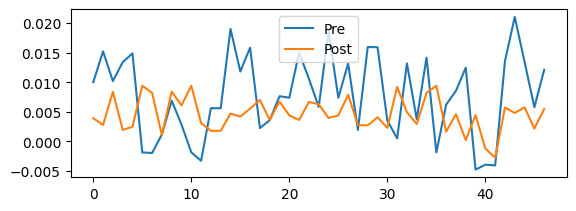

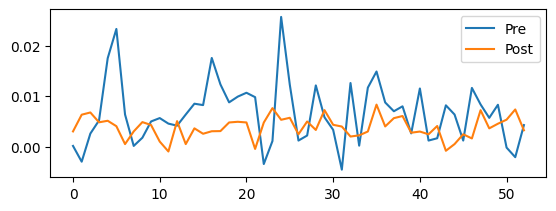

In [5]:
import numpy as np
import random
correct_answers = []
wrong_answers = []
pre_similarity_wrong = []
pre_similarity_correct = []
post_similarity_wrong = []
post_similarity_correct = []

filename = 'outputs/log_3.txt'
with open(filename, 'r') as f:
    lines = f.readlines()[22:]
    for i in range(0, len(lines)-2, 7):
        line_ = lines[i:i+7]
        sample_number = line_[0].split(':')[-1].strip()
        sample_id = line_[1].split(':')[-1].strip()
        string = line_[5][:-1]
        # print(string, type(string))
        pre_similarity = float(line_[6].split()[0].strip())
        post_similarity = float(line_[6].split()[1].strip())
        if (string.startswith('correct')):
            correct_answers.append(sample_number)
            pre_similarity_correct.append(pre_similarity)
            post_similarity_correct.append(post_similarity)
        else:
            wrong_answers.append(sample_number)
            pre_similarity_wrong.append(pre_similarity)
            post_similarity_wrong.append(post_similarity)
        
print(pre_similarity_wrong)
print(pre_similarity_correct)

print(post_similarity_wrong)
print(post_similarity_correct)

import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(pre_similarity_correct, label='Pre')
plt.plot(post_similarity_correct, label='Post')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(pre_similarity_wrong, label='Pre')
plt.plot(post_similarity_wrong, label='Post')
plt.legend()
plt.show()

In [43]:
pre_similarity_wrong = np.array(pre_similarity_wrong)
pre_similarity_correct = np.array(pre_similarity_correct)
post_similarity_wrong = np.array(post_similarity_wrong)
post_similarity_correct = np.array(post_similarity_correct)


print(np.mean(post_similarity_correct - pre_similarity_correct)*1.5)
print(np.mean(post_similarity_wrong - pre_similarity_wrong)*1.5)

avg = len(post_similarity_correct) * np.mean(post_similarity_correct - pre_similarity_correct) + len(post_similarity_wrong) * np.mean(post_similarity_wrong - pre_similarity_wrong)
avg /= len(pre_similarity_correct) + len(pre_similarity_wrong)
print(avg*1.5)

0.12351061909832592
0.1324473263152151
0.12896201050062833


[0.026476268, 0.011982684, 0.012455394, 0.02209302, 0.02689822, 0.01251365, 0.014791123, 0.005240112, 0.019742649, 0.023812965, 0.02720282, 0.020201046, 0.01867666, 0.015034452, 0.024988184, 0.004581625, 0.021653807, 0.023064723, 0.023605248, 0.017800773, 0.020611057, 0.019614784, 0.010902666, 0.0126643265, 0.026457623, 0.021088524, 0.010008526, 0.023237245, 0.020402545, 0.021649603, 0.01837126, 0.015581444, 0.007498957, 0.01837126, 0.013600551, 0.016511336, 0.02201384, 0.015034452, 0.024421496, 0.028620357, 0.011165061, 0.020201046, 0.011779899, 0.01845743, 0.012312302, 0.029249117, 0.018984437, 0.023539614, 0.020477446, 0.02089193, 0.010288994, 0.024755836, 0.013584577, 0.020662328, 0.015066509, 0.02064269, 0.014076421, 0.020477446, 0.020340314, 0.019850122, 0.02541635, 0.021828381]
[0.01980161, 0.015682163, 0.01929953, 0.017112197, 0.011239701, 0.021353478, 0.024106286, 0.0072217155, 0.019307425, 0.018929102, 0.013977289, 0.013291671, 0.017080352, 0.014138642, 0.015682163, 0.0231436

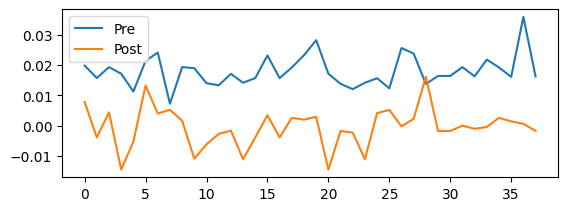

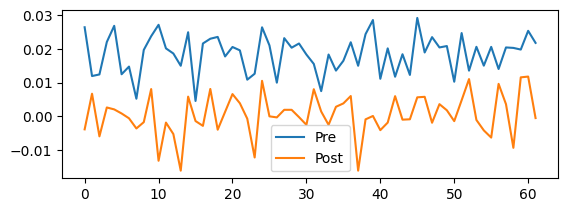

In [4]:
import numpy as np
import random
correct_answers = []
wrong_answers = []
pre_similarity_wrong = []
pre_similarity_correct = []
post_similarity_wrong = []
post_similarity_correct = []

filename = 'outputs/log_4.txt'
with open(filename, 'r') as f:
    lines = f.readlines()[22:]
    for i in range(0, len(lines)-2, 7):
        line_ = lines[i:i+7]
        sample_number = line_[0].split(':')[-1].strip()
        sample_id = line_[1].split(':')[-1].strip()
        string = line_[5][:-1]
        # print(string, type(string))
        pre_similarity = float(line_[6].split()[0].strip())
        post_similarity = float(line_[6].split()[1].strip())
        if (string.startswith('correct')):
            correct_answers.append(sample_number)
            pre_similarity_correct.append(pre_similarity)
            post_similarity_correct.append(post_similarity)
        else:
            wrong_answers.append(sample_number)
            pre_similarity_wrong.append(pre_similarity)
            post_similarity_wrong.append(post_similarity)
        
print(pre_similarity_wrong)
print(pre_similarity_correct)

print(post_similarity_wrong)
print(post_similarity_correct)

import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(pre_similarity_correct, label='Pre')
plt.plot(post_similarity_correct, label='Post')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(pre_similarity_wrong, label='Pre')
plt.plot(post_similarity_wrong, label='Post')
plt.legend()
plt.show()

In [46]:
pre_similarity_wrong = np.array(pre_similarity_wrong)
pre_similarity_correct = np.array(pre_similarity_correct)
post_similarity_wrong = np.array(post_similarity_wrong)
post_similarity_correct = np.array(post_similarity_correct)


avg = len(post_similarity_correct) * np.mean(post_similarity_correct - pre_similarity_correct) + len(post_similarity_wrong) * np.mean(post_similarity_wrong - pre_similarity_wrong)
avg /= len(pre_similarity_correct) + len(pre_similarity_wrong)
print(avg*1.5)

0.1609463800619198


In [1]:
import tensorflow_hub as hub
import tensorflow_text  # This import is necessary for the USE model to work properly.
import numpy as np

# Load the Universal Sentence Encoder's model from TensorFlow Hub
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)

def get_sentence_embeddings(sentences):
    # Generate embeddings for each input sentence
    embeddings = model(sentences)
    return embeddings.numpy()

# Example usage
sentences = [
    "Hello, how are you?",
    "The weather is great today!",
    "Machine learning is fun."
]

embeddings = get_sentence_embeddings(sentences)
print(embeddings)

2024-04-27 16:40:51.036207: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 16:40:52.372747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-27 16:41:06.510230: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-27 16:41:06.513899: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use

[[-0.04013541 -0.03451603  0.03594451 ... -0.01770568 -0.02030313
   0.00751264]
 [-0.06073917 -0.05437659 -0.02384639 ...  0.01170365 -0.01552748
   0.0507541 ]
 [ 0.04947955 -0.07923072 -0.05692712 ...  0.03792699 -0.06104521
  -0.01936475]]


In [2]:
print(embeddings.shape)

(3, 512)


In [3]:
from flair.data import Sentence

In [4]:
from flair.embeddings import SentenceTransformerDocumentEmbeddings

In [7]:
import torch
from transformers import BertModel, BertTokenizer

def get_bert_embeddings(sentence):
    # Initialize tokenizer and model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Encode the input sentence and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Get the embeddings
    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = model(**inputs)

    # outputs.last_hidden_state contains the embeddings for each token
    embeddings = outputs.last_hidden_state

    # Optionally, you can take the embedding of the [CLS] token as the sentence representation
    sentence_embedding = embeddings[:, 0, :]

    return sentence_embedding

# Example usage
sentence = "Hello, world!"
embedding = get_bert_embeddings(sentence)
# print(embedding)


In [8]:
print(embedding.shape)

torch.Size([1, 768])


In [14]:
# from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
def get_sentence_embeddings(sentences):
    # Load a pre-trained mode
    
    # Generate embeddings for the provided list of sentences
    embeddings = model.encode(sentences)
    
    return embeddings

In [15]:
# Example usage
sentences = [
    "Hello, how are you?",
    "The weather is great today!",
    "Learning how to use sentence transformers is fun."
]

embeddings = get_sentence_embeddings(sentences)

In [16]:
print(embedding.shape)

torch.Size([1, 768])


In [17]:
import torchvision
import numpy as np
import json
import torch
import torchvision.models.detection as detection
from torchvision import models, transforms

model_resnet = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

train_image_ids_map = 'data/train_image_id_mapping.json'
test_image_ids_map = 'data/test_image_id_mapping.json'
train_embeddings_load_path = 'data/embeddings/images/train_image_embeddings_resnet50.npy'
test_embeddings_load_path = 'data/embeddings/images/test_image_embeddings_resnet_50.npy'

images_representation = np.load(train_embeddings_load_path, allow_pickle=True).astype(np.float16)
# images_representation = torch.from_numpy(images_representation).float()
print("Successfully loaded train image embeddings with shape ", images_representation.shape)
with open(train_image_ids_map, 'r') as f:
    images_id = json.load(f)
    print("Successfully loaded train image ids with length ", len(images_id))
    
from PIL import Image

model_resnet.eval()
# x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]

# x = np.load('/home/raj/code/mml/LatentAlignmentProcedural/data/images/train/images-qa/zucchini-spaghetti_9_0.jpg')

img = Image.open('/home/raj/code/mml/LatentAlignmentProcedural/data/images/train/images-qa/zucchini-spaghetti_9_0.jpg')
img = img.resize((224, 224))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)
# img = img.to(device)

if img.shape[-3] == 1:
    img = img.repeat(1, 3, 1, 1)
if img.shape[-3] > 3:
    img = img[:, :3, :, :]


predictions = model_resnet(img)

[0.038194817, 0.026275253, 0.045638338, 0.038006023, 0.039392415, 0.051229484, 0.032153618, 0.045876477, 0.040873725, 0.041890446, 0.04147409, 0.040590864, 0.035338175, 0.041165505, 0.037261654, 0.0423716, 0.031895887, 0.036409978, 0.04127815, 0.034988813, 0.024862528, 0.030612893, 0.02801344, 0.036312304, 0.035087604, 0.033624623, 0.04792176, 0.0466814, 0.036108457, 0.029740814, 0.039745014, 0.031772967, 0.029482653, 0.03706812, 0.03476474, 0.038345397, 0.037599888, 0.031623118, 0.038546994, 0.03996743, 0.037798308, 0.040741127, 0.037439447, 0.033593502, 0.03452675, 0.030631538, 0.053143468, 0.033705283, 0.043138243, 0.034497984, 0.037501644, 0.033019062, 0.03387737, 0.03231579, 0.033941228, 0.03004912, 0.045039125, 0.04144963, 0.026948653, 0.041515645, 0.041052908, 0.035778377, 0.04160676, 0.024956178, 0.02791272, 0.03917595, 0.025262868, 0.044700366, 0.031975623, 0.031716697, 0.041065093, 0.029478282, 0.039964367, 0.03585197, 0.039328016, 0.033602625, 0.042675104, 0.043254513, 0.036

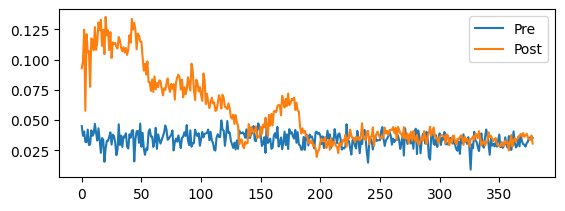

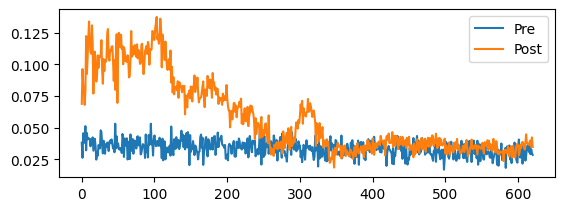

In [35]:
import numpy as np
import random
correct_answers = []
wrong_answers = []
pre_similarity_wrong = []
pre_similarity_correct = []
post_similarity_wrong = []
post_similarity_correct = []

filename = 'outputs/log_new.txt'
with open(filename, 'r') as f:
    lines = f.readlines()[3:32000]
    for i in range(0, len(lines)-2, 7):
        try:
            line_ = lines[i:i+7]
            # print(line_)
            sample_number = line_[0].split(':')[-1].strip()
            sample_id = line_[1].split(':')[-1].strip()
            string = line_[5][:-1]
            # print(string, type(string))
            pre_similarity = float(line_[6].split()[0].strip())
            post_similarity = float(line_[6].split()[1].strip())
            if (string.startswith('correct')):
                correct_answers.append(sample_number)
                pre_similarity_correct.append(pre_similarity)
                post_similarity_correct.append(post_similarity)
            else:
                wrong_answers.append(sample_number)
                pre_similarity_wrong.append(pre_similarity)
                post_similarity_wrong.append(post_similarity)
        except:
            pass
        
print(pre_similarity_wrong)
print(pre_similarity_correct)

print(post_similarity_wrong)
print(post_similarity_correct)

import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(pre_similarity_correct, label='Pre')
plt.plot(post_similarity_correct, label='Post')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(pre_similarity_wrong, label='Pre')
plt.plot(post_similarity_wrong, label='Post')
plt.legend()
plt.show()

[0.032128647, 0.03781023, 0.0402537, 0.033826984, 0.04263522, 0.036480464, 0.041955385, 0.033907715, 0.044886902, 0.025401853, 0.04154399, 0.03203469, 0.034399156, 0.014863389, 0.027124008, 0.034063343, 0.033277825, 0.023367371, 0.008159132, 0.027475104, 0.03354971, 0.043292664, 0.036139574, 0.050414503, 0.036500316, 0.031088516, 0.034001544, 0.039541673, 0.0440487, 0.037383147, 0.027149653, 0.04154399, 0.032128647, 0.04263522, 0.032593228, 0.04105779, 0.043292664, 0.036323886, 0.029710827, 0.049075253, 0.02898749, 0.038873397, 0.033534534, 0.033907715, 0.030361801, 0.050414503, 0.039534044, 0.039825384, 0.02913783, 0.039663628, 0.034637928, 0.025401853, 0.031986047, 0.03250865, 0.022822559, 0.03250865, 0.050414503, 0.03859452, 0.050414503, 0.028704342, 0.041544173, 0.038367856, 0.027919289, 0.04295111, 0.036964696, 0.025393212, 0.035726875, 0.0275455, 0.03723329, 0.038944043, 0.04065874, 0.039211646, 0.030465389, 0.036113024, 0.050414503, 0.03354971, 0.033534534, 0.022822559, 0.029740

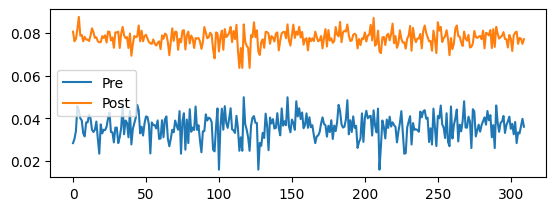

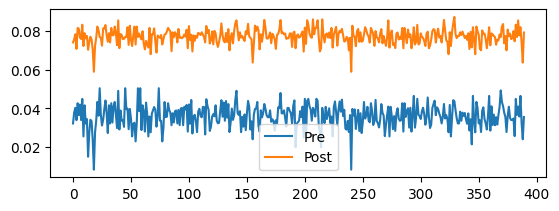

In [38]:
import numpy as np
import random
correct_answers = []
wrong_answers = []
pre_similarity_wrong = []
pre_similarity_correct = []
post_similarity_wrong = []
post_similarity_correct = []

filename = 'outputs/log_new_test.txt'
with open(filename, 'r') as f:
    lines = f.readlines()[22:]
    for i in range(0, len(lines)-2, 7):
        try:
            line_ = lines[i:i+7]
            # print(line_)
            sample_number = line_[0].split(':')[-1].strip()
            sample_id = line_[1].split(':')[-1].strip()
            string = line_[5][:-1]
            # print(string, type(string))
            pre_similarity = float(line_[6].split()[0].strip())
            post_similarity = float(line_[6].split()[1].strip())
            if (string.startswith('correct')):
                correct_answers.append(sample_number)
                pre_similarity_correct.append(pre_similarity)
                post_similarity_correct.append(post_similarity)
            else:
                wrong_answers.append(sample_number)
                pre_similarity_wrong.append(pre_similarity)
                post_similarity_wrong.append(post_similarity)
        except:
            pass
        
print(pre_similarity_wrong)
print(pre_similarity_correct)

print(post_similarity_wrong)
print(post_similarity_correct)

import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(pre_similarity_correct, label='Pre')
plt.plot(post_similarity_correct, label='Post')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(pre_similarity_wrong, label='Pre')
plt.plot(post_similarity_wrong, label='Post')
plt.legend()
plt.show()

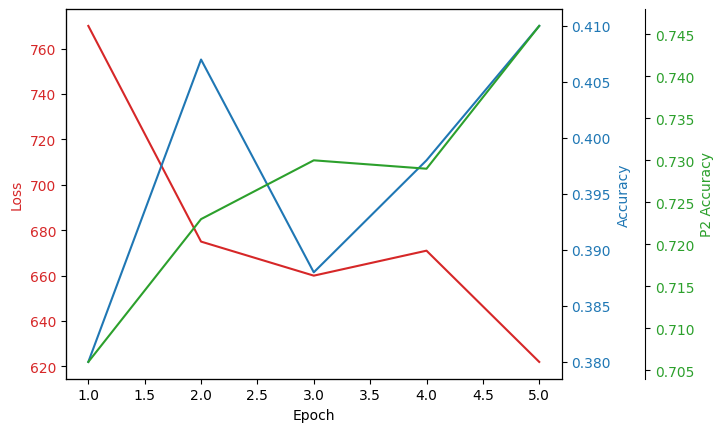

In [48]:
# Training Loss change over time

import matplotlib.pyplot as plt

train_losses = [770, 675, 660, 671, 622]
train_accuracy = [0.38, 0.407, 0.388, 0.398, 0.41]
train_p2_accuracy = [0.706, 0.723, 0.73, 0.729, 0.746]

test_acc = 0.45
test_p2_acc = 0.816


#Plot Train Losses and Accuracies

x = [1,2,3,4,5]

#Plot train accuracies on the left y axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(x, train_losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Instantiate a second y axis that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(x, train_accuracy, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Also plot the p2 accuracies 
ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('P2 Accuracy', color=color)
ax3.plot(x, train_p2_accuracy, color=color)
ax3.tick_params(axis='y', labelcolor=color)



In [56]:
# oPEN THE RECIPE - sugar-free-sloe-gin-recipe - from the dataset

import json

with open('data/recipeqa-test.json', 'r') as f:
    data = json.load(f)
    
!pwd

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/home/raj/code/mml/LatentAlignmentProcedural


In [63]:
# data['sugar-free-sloe-gin-recipe']

print(data['data'][0])

#Convert to dict with keys as recipe_id

recipe_dict = {}
for recipe in data['data']:
    recipe_dict[recipe['recipe_id']] = recipe


{'recipe_id': 'vegan-jerky', 'context_modality': ['body', 'title', 'videos'], 'split': 'test', 'context': [{'body': "This is what you'll need:- 4 oz (half a bag) Soy Curls (textured soy protein) *- 1/2 tsp garlic powder- 1/2 tsp chili powder- 1 tsp black pepper- 1/2 tsp onion powder- 1/2 tsp smoked paprika- 2 tsp sesame oil **- 2 tsp Sri Racha sauce (add to taste)- 1 1/2 tsp liquid smoke ***- 1 tbsp maple sirup- 2 1/2 tbsp soy sauce- 1 tbsp apple cider vinegar- 3 tbsp vital wheat gluten ***** Find it on amazon if your local store only sells the powdered one** Find it at any asian grocery store*** Find it next to the bbq sauce at the grocery store**** Adds a fatty-like texture - can be omitted ", 'id': 1, 'videos': [], 'title': 'Gather the Ingredients'}, {'body': 'Whisk together everything in a medium sized bowl EXCEPT for the vital wheat gluten and the soy curls.', 'id': 2, 'videos': [], 'title': 'Mix'}, {'body': 'Add the soy curls and mix them with you hand so they get all coated with

In [64]:
recipe = recipe_dict['sugar-free-sloe-gin-recipe']

In [70]:
# print(recipe['context'])

i = 1
for context in recipe['context']:
    print(str(i) + " " + context['body'])
    i += 1

1 Distilling is illegal in many countries/states. Check your local laws.
2 Methanol poisoning ....... Methanol is a product of the fermentation process and is present in all beers and ciders but must be carefully removed during the distillation process. Methanol can cause blindness, damage to the central nervous system and death. The vapour is also explosive.                    Ethanol explosive vapour ....... Make sure that your still is well ventilated and never use an open flame for heating. Electric stills often have an electrical thermostat that produces a spark every time it switches on or off which will ignite ethanol vapour in the right combination with air. Water distillers will switch at >100 degrees C by which time the ethanol should be gone.                 Always fill a water distiller exactly to the line marked - no higher or lower. If filled too low it will boil too quickly.  Drink sensibly!              Sulphides ........ Make sure there is some copper in the still.    